it can be useful to import commonly used packages with shortened names:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

you can specify what you want from a package when you import it:

In [ ]:
from math import sqrt
print(sqrt(9))

3.0


or you can import a package and specify the package each time you use a function from it: 

In [ ]:
import math
print(math.sqrt(9))

3.0


# Working with Arrays
From images (values distributed over space) to time series (values distributed over time) to spectra (values distributed over wavelength) to combinations of the above and much more, the Array (sometimes called a Tensor) is the fundamental datatype of most physical programming.

Arrays are sets of numbers of a given shape and dimension. The dimension is the number of axes, and the shape is a tuple representing the size of each.

Let's make some arrays that we can work with.

## Populating Arrays

This can be done in a few ways. 

In [ ]:
#manually defining a 1d array
myarray = np.array([1, 2, 3])
#manually defining a 2d array 
my2darray = np.array([[1,2,3],[4,5,6]])

#generating numbers between -5 and 5 with spacing 0.001
x_data_arange = np.arange(-5, 5, 0.001)

#generating 50 numbers evenly spaced between 1-100
x_data_linspace = np.linspace(1, 100, 50)

## Modifying and Displaying Array "Slices"

Sometimes, you only want to deal with a certain part of an array. Perhaps it's an image of a field of stars, and you want to make a new array that only contains one of the stars.

Let's start by creating some empty space.

In [ ]:
# np.zeros creates an array of zeros of a specified shape
# it's a great tool for allocating a blank sheet of memory to play with!
canvas = np.zeros((20,20))
print(canvas)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

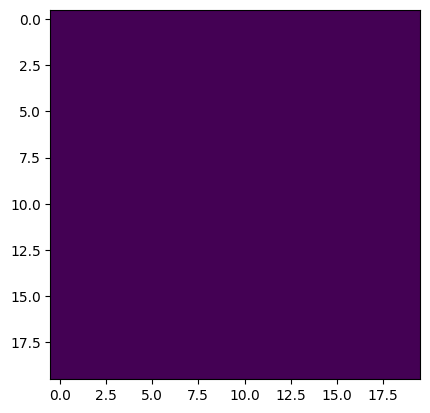

In [ ]:
# We can also plot it as an image
plt.imshow(canvas)

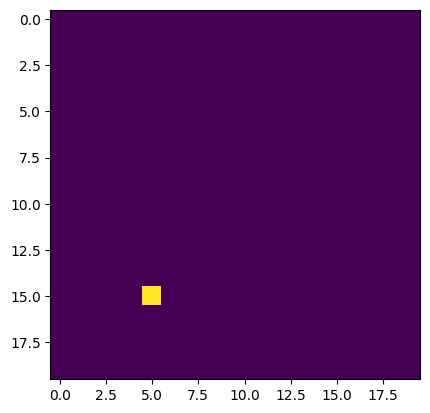

In [ ]:
# Now I can change specific pixel values like this
canvas[15][5] = 10

plt.imshow(canvas)

The first number is the y-coordinate, and the second is x!

The origin is in the upper left!

This is because a 2D array is a vertical array of of horizontal 1D arrays. The first number selects which index of the parent array of arrays you want to edit, and the second selects the index of that array.

Next, let's try modifying values, instead of just setting them.

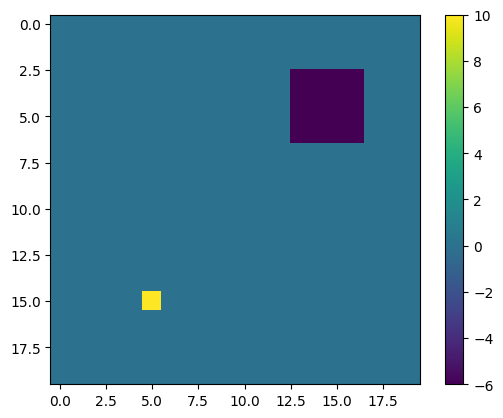

In [ ]:
# adjacent square brackets can be combined with a comma
# ranges of values can be specified with a colon
canvas[3:7,13:17] -= 6
# This is a "slice" of an array!

plt.imshow(canvas)
# and let's add a colorbar as things get busy
plt.colorbar()

We have modified a subset, or "slice" of the array.

The notation used (commas and colons) is called "slicing" an array. An array "slice" is NOT its own object. It is a pointer to the specified addresses. This persists even if the slice is given its own variable.

### NOTE

Mathematically, subtracting a number from an array makes intuitive sense, but on a computer science level this is a little odd.

These operations add together two very different objects. One is two dimensional, the other is zero dimensional. Python accomplishes this by *broadcasting*. It takes a lower-dimensional object and copies it along each new axis until it is the same size as the higher-dimensional object. We'll talk more about this later. For now, I'll drop a link to the manual about how this happens: https://numpy.org/doc/stable/user/basics.broadcasting.html

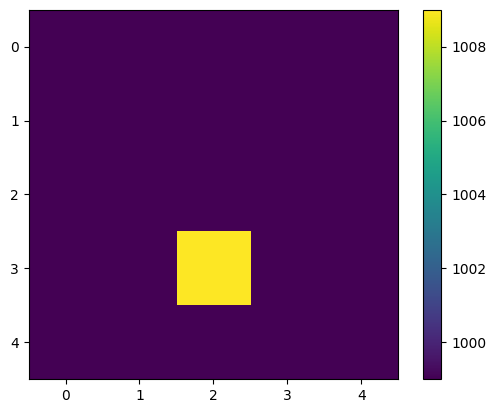

In [ ]:
# Let's make a variable that's a slice of our canvas
subcanvas = canvas[12:17,3:8]

plt.imshow(subcanvas)
plt.colorbar()

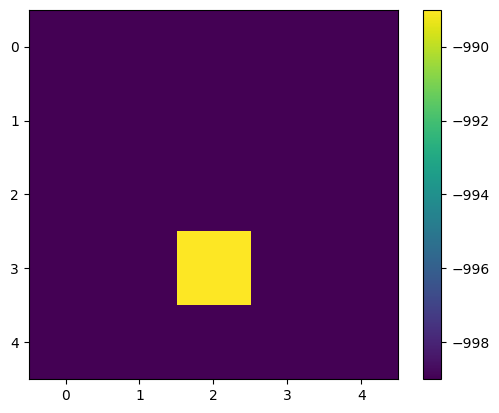

In [ ]:
# Now, let's add some value, and see what happens
subcanvas -= 999

plt.imshow(subcanvas)
plt.colorbar()

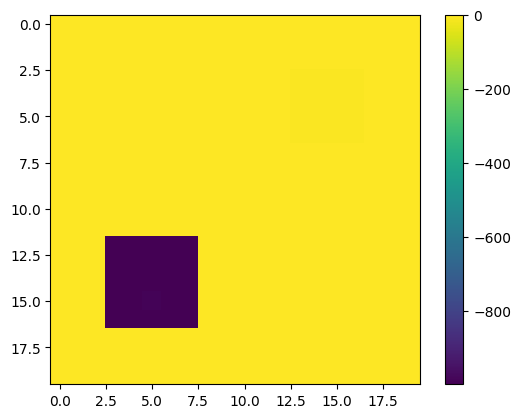

In [ ]:
# But wait, that changed the main canvas too!

plt.imshow(canvas)
plt.colorbar()

To reiterate, a slice is NOT its own object, it is a collection of pointers to values in the parent.  If you want to make a slice that you can edit freely without modifying the original data, make a copy!

In [ ]:
# Making a copy using numpy ndarray's built-in copy method (specific to this object)
subcanvas = canvas[12:17,3:8].copy()
# Making a copy using numpy's general copy function (can find a way to copy most objects)
subcanvas = np.copy(canvas[12:17,3:8])

# For loops and performance

Python is slow, especially when looping through large datasets, and especially especially when doing nested loops through big arrays. C is faster than python, [about two orders of magnitude faster by some metrics](https://github.com/niklas-heer/speed-comparison). Numpy functions are written in C. Any time you can offload a for loop into a numpy function (usually a broadcast), you can greatly speed up your code.

In [ ]:
# not really all that big, but big enough to see the effect
bigarray = np.ones((1000,1000))
import time

In [ ]:
start = time.time()
for i in range(len(bigarray)):
    for j in range(len(bigarray[0])):
        bigarray[i][j] + bigarray[j][i]

print("for loops time: " + str(time.time()-start))
# On my computer this took 0.643669843673706 seconds

for loops time: 1.5419435501098633


In [ ]:
start = time.time()
bigarray + bigarray.transpose()
print("with array transformation in C: " + str(time.time()-start))
# On my computer this took 0.005024433135986328 seconds

with array transformation in C: 0.019437074661254883


You can easily see how this can really start to add up if you are doing more complex operations within the for loop, and/or operating on datasets that are actually really big.

If your code is having performance problems, or if you just want to avoid them, a good rule of thumb is to offload as many for loops into C as possible. Sometimes this involves getting creative with array transformations and mathematical relationships.

If you are having performance issues and aren't sure how to remove some of your for loops, this manual is your best friend: https://numpy.org/doc/stable/user/basics.broadcasting.html

###Functions
Functions are an essential part of Python.
The proper use of functions can save a lot of time when repeating the same tasts.

In [1]:
'''Below is a generic function

def tells python that what follows is a function
next is the function name, "function" in this case
finally, the arguments go in the parenthesis
'''

def function(arg1, arg2):
    '''This is a docstring
    
    it is good practice to include docstrings 
    at the start of defined functions
    to explain what the function is doing.
    This function just prints out the two input arguments
    '''
    
    print(f'this is arg1: {arg1}') # using f'some text {variable}' puts the variable directly into string format
    print(f'this is arg2: {arg2}') # look up f-string for more advanced use cases

Let's test this function out!

In [3]:
function(1, 'hello world')

this is arg1: 1
this is arg2: hello world


As expected, the function printed out the two input arguments using f-strings

Let's try a more complicated function

In [4]:
def circle_area(radius:float)->float:
    '''Equation for the area of a circle
    
    radius is the circle radius'''
    return 3.14159 * radius**2

What a minute! What is all that new stuff in the function?

Using :type in the arguments section of a function gives an indication of what type the input should be.

This can help combat the issue of type errors.

The ->type gives an indication of the output of the function.

This ensures that if you use the output elsewhere it will be the type you want.

In [5]:
# we can set variables equal to the output of a function

area_1 = circle_area(1)
area_5 = circle_area(5)

print(area_1)
print(area_5)

3.14159
78.53975


In [7]:
# if the function does not return anything then the variable takes the None type

func_1 = function(1,2)

print(type(func_1))
print(type(area_1))

this is arg1: 1
this is arg2: 2
<class 'NoneType'>
<class 'float'>


Functions should be used anywhere code is being repeated.

This cleans up your workplace from being cluttered with repeat code.

It also ensures that if you want to change your code, you only have to do it once.

### Classes

Many things you are used to working with in Python are classes. This is because classes are extremely powerful.

Objects in Python are formed from classes and save unique information about that object.

In [8]:
'''Below is a generic class

class tells python that what follows is a class
next is the class name, "Class" in this case
it is common practice for class names to be capitalized
'''

class Class:
    PI = 3.1415 # we can set class values here

In [9]:
# let's make a single class instance
class_instance_one = Class()

In [10]:
# see that the instance type is that of the class
print(type(class_instance_one))

<class '__main__.Class'>


In [11]:
# the class value is kept for all instances
class_instance_one.PI

3.1415

The main power of classes comes from each instance being customizeable

In [12]:
class Custom:
    '''Example class to show instance
    
    __init__ initializes an instance of a class
    self refers to this instance of the class
    argument is the input that makes this instance unique
    self.argument is known as an instance variable
    '''
    def __init__(self, argument):
        self.arg = argument

In [13]:
# here we make a custom object with is an instance of the Custom class
custom = Custom(0)

In [14]:
# custom is now whatt self was in the class definition
# custom.arg saves the original input
print(custom.arg)

0


In [15]:
class Complex(Custom):
    '''Example class to show inheritance and methods
    
    putting Custom in Complex allows Complex access to the Custom __init__
    a method is a function defined within a class
    you call is as class_instance.method()
    '''
    def print_out(self):
        '''Method for printing out the instance argument
        
        self refers to the instance of the Complex class
        without self the function cannot access the '''
        print(f'argument is: {self.arg}')

In [16]:
complex = Complex(0)

In [17]:
complex.print_out()

argument is: 0


Let's combine the class idea with a function from earlier

In [18]:
class Circle:
    PI = 3.14159
    def __init__(self, radius:float): # note, no ->type here because nothing is being returned
        '''Class that represents a circle
        
        radius is the radius of the circle instance'''
        self.radius = radius
    
    def area(self)->float: # ->float here because the method returns a float
        '''Calculate the area of the circle'''
        return self.PI * self.radius**2

In [19]:
circle_1 = Circle(1)
circle_5 = Circle(5)

In [20]:
print(circle_1.area())
print(circle_5.area())

3.14159
78.53975


#### Group Project

The best way to learn Python is by writing Python code!

For the first assignment, go back to the main Jupyter Notebook window in your browser.

Click New and then Text File. Name the file my_class.py.

In this file write a Sphere class that takes radius as input.

Add two methods that compute the surface area and volume, respectively.

Make a new Notebook and  do "import my_class.Sphere as Sphere"

Generate multiple instances of the Sphere class with different radii.

Print out the radius, surface area, and volume of each sphere.

### Second Project

Make a new file called functions.py.

Write a function called make_array that takes in two numpy arrays.

The function should return a 2d numpy array for the value of your function at each point along the arrays.

You can make the function as complex as you like.

Write a second function called make_plot that uses .pcolormesh to plot the 2darray.

Import the .py file into a notebook with "import functions as func"

Define your arrays in the notebook and pass them into the imported func.make_array function

Plot the resulting array with funct.make_plot

Can you combine both of these functions into the methods of a single class?